In [80]:
import os
import string

import re

from tika import parser

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np


from matplotlib.gridspec import GridSpec


#### Load desired PDFs/text files

In [6]:
base_filepath = '/Users/ryanmcgranaghan/Documents/Helio_ECIP/Documents/'
file_awards_2018 = os.path.join(base_filepath,'ECIP_awards_2018.pdf')
file_awards_2020 = os.path.join(base_filepath,'ECIP_awards_2020.pdf')

parsed_2018 = parser.from_file(file_awards_2018)
parsed_2020 = parser.from_file(file_awards_2020)


2021-03-01 08:53:40,807 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /var/folders/kj/vszwmj9164v3q6k055zpwtj00000gn/T/tika-server.jar.
2021-03-01 08:54:12,222 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /var/folders/kj/vszwmj9164v3q6k055zpwtj00000gn/T/tika-server.jar.md5.
2021-03-01 08:54:12,636 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [7]:
parsed_2018.keys()

dict_keys(['metadata', 'content', 'status'])

In [10]:
parsed_2018['metadata']

{'Author': 'Sinyan Whitfield',
 'Comments': '',
 'Company': '',
 'Content-Type': 'application/pdf',
 'Creation-Date': '2019-04-24T23:40:16Z',
 'Keywords': '',
 'Last-Modified': '2019-04-25T13:01:23Z',
 'Last-Save-Date': '2019-04-25T13:01:23Z',
 'SourceModified': 'D:20190424232659',
 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser',
  'org.apache.tika.parser.pdf.PDFParser'],
 'X-TIKA:content_handler': 'ToTextContentHandler',
 'X-TIKA:embedded_depth': '0',
 'X-TIKA:parse_time_millis': '2872',
 'access_permission:assemble_document': 'true',
 'access_permission:can_modify': 'true',
 'access_permission:can_print': 'true',
 'access_permission:can_print_degraded': 'true',
 'access_permission:extract_content': 'true',
 'access_permission:extract_for_accessibility': 'true',
 'access_permission:fill_in_form': 'true',
 'access_permission:modify_annotations': 'true',
 'cp:subject': '',
 'created': '2019-04-24T23:40:16Z',
 'creator': 'Sinyan Whitfield',
 'date': '2019-04-25T13:01:23Z',
 'dc:c

In [11]:
content_2018 = parsed_2018['content']
content_2020 = parsed_2020['content']


In [12]:
content_2018

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \nHeliophysics - Early Career Investigator Program \n\nAbstracts of Selected Proposals \n(NNH18ZDA001N-ECIP) \n\n \nBelow are the abstracts of proposals selected for funding for the Heliophysics – Early Career \nInvestigator Program. Principal Investigator (PI) name, institution, and proposal title are also \nincluded. 50 proposals were reviewed in response to this opportunity. On April 1, 2019, 11 \nproposals were selected for funding.  \n\n \n \n\n \nHaihong Che/University of Maryland, College Park  \nElectron Heating and Plasma Emission in the Solar Corona  \n \nNanoflares heating has been recognized as an important process that contributes to the heating of \nthe solar corona, particularly to electron heating in the lower corona. Similar to solar flares, \nnanoflares are also a type of impulsive magnetic reconnection (MR), typically with a strong \nguide f

In [63]:
# Get the names of the 2018 recipients
instances_2018 = []
instances_2018 = instances_2018 + [m.start() for m in re.finditer('\n \n\n  \n', content_2018)]
instances_2018 = instances_2018 + [m.start() for m in re.finditer('\n\n \n \n', content_2018)]
instances_2018

names_2018 = []
for i in instances_2018:
    names_2018 = names_2018+[content_2018[i:i+content_2018[i:i+30].find('/')].replace('\n','').replace(' ','')]
#     print(content_2018[i:i+content_2018[i:i+30].find('/') ].strip('\n'))
names_2018                            

['McArthurJones',
 'HaihongChe',
 'MichaelHartinger',
 'SethDorfman',
 'WeichaoTu',
 'ChristinaKay',
 'MariaKazachenko',
 'XiangningChu',
 'KristopherKlein',
 'RalucaIlie',
 'RekaWinslow']

In [64]:
# Get the names of the 2020 recipients
instances_2020 = []
instances_2020 = instances_2020 + [m.start() for m in re.finditer('\n \n\n  \n', content_2020)]
instances_2020 = instances_2020 + [m.start() for m in re.finditer('\n\n \n \n', content_2020)]
instances_2020

names_2020 = []
for i in instances_2020:
    names_2020 = names_2020+[content_2020[i:i+content_2020[i:i+30].find('/')].replace('\n','').replace(' ','')]
#     print(content_2020[i:i+content_2020[i:i+30].find('/') ].strip('\n'))
names_2020 

['NadaAl-Haddad', 'RyanMcGranaghan']

#### Work with the full text data and analyze word frequency

In [82]:
tokens = word_tokenize(content_2018)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2018 = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words_2018 = [w for w in words_2018 if not w in stop_words]

tokens = word_tokenize(content_2020)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2020 = [word for word in stripped if word.isalpha()]
# filter out stop words
words_2020 = [w for w in words_2020 if not w in stop_words]



In [75]:
# Functions pulled from: https://programminghistorian.org/en/lessons/counting-frequencies
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [83]:
freqdict_2018 = wordListToFreqDict(words_2018)
sortedfreqdict_2018 = sortFreqDict(freqdict_2018)


freqdict_2020 = wordListToFreqDict(words_2020)
sortedfreqdict_2020 = sortFreqDict(freqdict_2020)




In [84]:
occurrences_2018 = [w[0] for w in sortedfreqdict_2018]
words_2018 = [w[1] for w in sortedfreqdict_2018]

occurrences_2020 = [w[0] for w in sortedfreqdict_2020]
words_2020 = [w[1] for w in sortedfreqdict_2020]


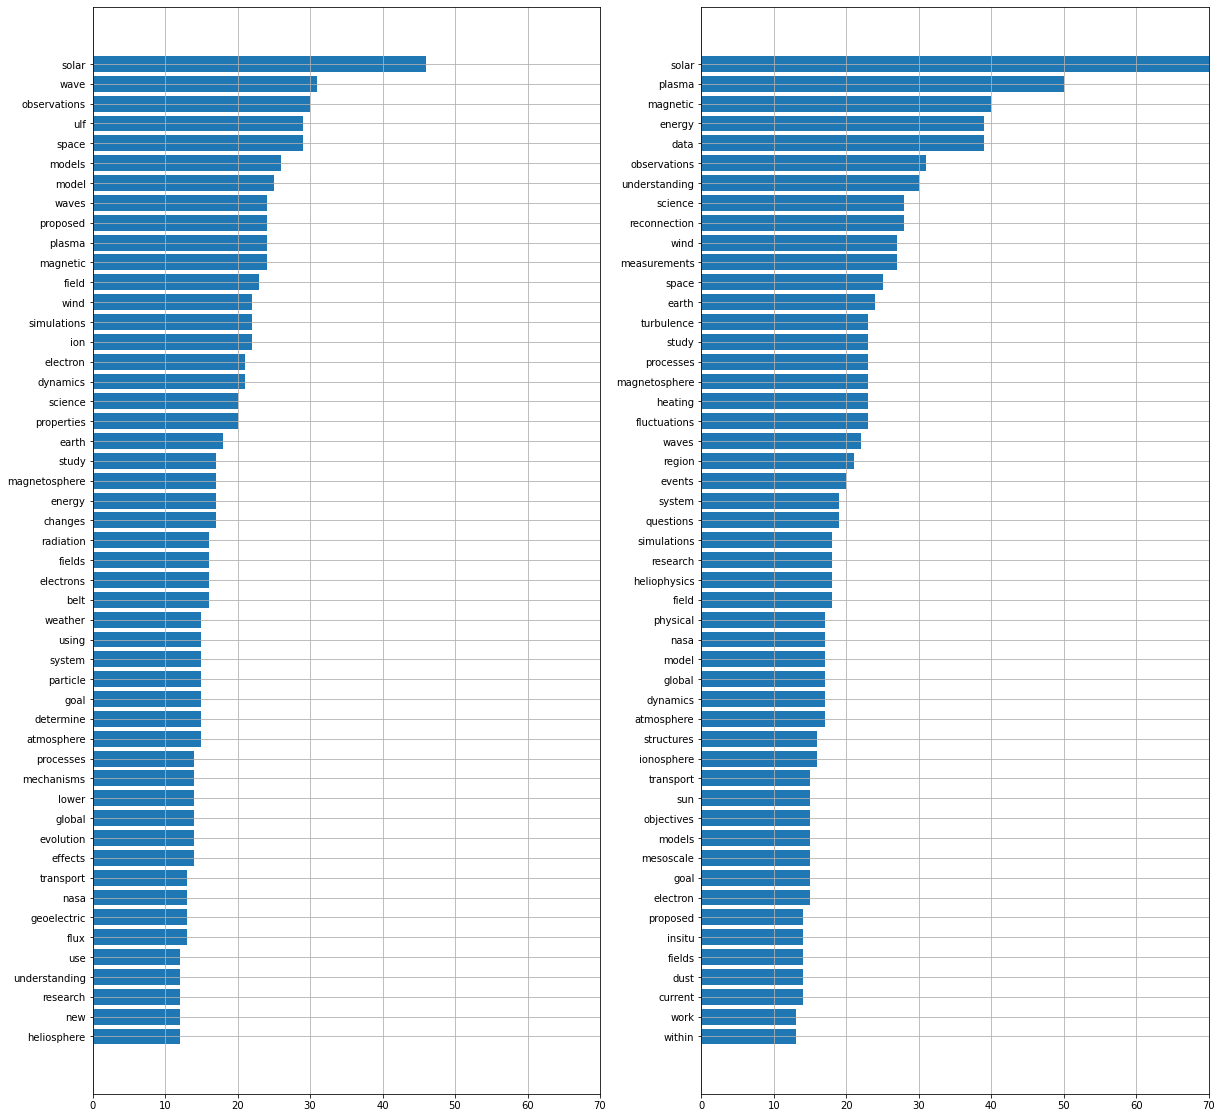

In [95]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(1,2, figure=fig)   

ax1 = fig.add_subplot(gs[0,0])
idx_to_plot = [0,50]
y_axis = np.arange(len(occurrences_2018[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1)
plt.barh(y_axis, occurrences_2018[idx_to_plot[0]:idx_to_plot[1]], align='center')
plt.yticks( y_axis,words_2018[idx_to_plot[0]:idx_to_plot[1]],) #)rotation='vertical')
plt.grid(True)
plt.xlim([0,70])

ax2 = fig.add_subplot(gs[0,1])
y_axis = np.arange(len(occurrences_2020[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1)
plt.barh(y_axis, occurrences_2020[idx_to_plot[0]:idx_to_plot[1]], align='center')
plt.yticks( y_axis,words_2020[idx_to_plot[0]:idx_to_plot[1]],) #)rotation='vertical')
plt.grid(True)
plt.xlim([0,70])

plt.show()
